In [330]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns 

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [331]:
csv_file = "csv/Audience Report.csv"
df = pd.read_csv(csv_file)

In [332]:
df.head()

,Display Audience Funnel,Display Supplier Country,Dell Fiscal Quarter,Display Vehicle,Display Business Unit,Display Report Site Name,Campaign Name,Media Buy Name,Display BRR Line Item,Audience Type Category (Raw),Flight Capped Spend (USD) - Final,Impressions,Clicks,True Conversion (GCSB) (Calc),True Revenue,US CSB CT+VT Conversions,US CSB CT+VT Revenue,US BU Visits,US Total Visits,Total COM HVEs 4.0 Custom (Calc) Updated,FM MAPs OA,US DPID Total Revenue,B2B vs CSB,9th Element,Audience ID,Audience Composition,Country-BU,Data provider,AIQ Attribute Category,1/2/3 PD,Audience ID Group,Clean Audience Type Category
0,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERH...,NaN,DOMAIN-3PD CONTEXTUAL,NaN,464233,407,0.0,736.69472,2.0,1001.209664,172,0,83,0.0,910.19,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL
1,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERD...,NaN,DOMAIN-3PD CONTEXTUAL,NaN,351621,660,0.0,0.0,NaN,0.0,235,0,59,0.0,NaN,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL
2,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERD...,NaN,DOMAIN-3PD CONTEXTUAL,NaN,993757,1652,0.0,0.118731,NaN,0.0,626,0,123,0.0,NaN,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL
3,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERD...,NaN,DOMAIN-3PD CONTEXTUAL,4518.771338,230321,341,0.0,0.0,1.0,404.3074,158,0,61,0.0,367.552,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL
4,Brand Seeker/Purchasers,Australia,FY24Q1,Video,Alienware,Fandom,2024_1H_AU_CSBO-AW_BSP_DISPLAY_PROSPECTING_DEM...,ValMorganOnline_Fandom_FANDOMVIDEOFANTAKEOVERM...,NaN,DOMAIN-3PD CONTEXTUAL,3168.728508,158126,109,0.0,559.388025,1.0,245.011648,56,0,65,0.0,222.737,CSB,NaN,CHECK,CHECK,CHECK,CHECK,CHECK,DOMAIN-3PD CONTEXTUAL,CHECK,DOMAIN-3PD CONTEXTUAL


In [333]:
df.fillna(0, inplace=True)
df['Flight Capped Spend (USD) - Final'] = df['Flight Capped Spend (USD) - Final'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)
df['US CSB CT+VT Revenue'] = df['US CSB CT+VT Revenue'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)
df['US DPID Total Revenue'] = df['US DPID Total Revenue'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

In [334]:
selected_cols = ['Display Audience Funnel','Display Supplier Country','Dell Fiscal Quarter','Display Vehicle'
                 ,'Display Business Unit','B2B vs CSB','Campaign Name','Clean Audience Type Category'
                 ,'Flight Capped Spend (USD) - Final','US CSB CT+VT Revenue','US DPID Total Revenue']

new_df = df[selected_cols]

In [335]:
new_df['Revenue'] = np.where(new_df['B2B vs CSB'] == 'CSB', new_df['US CSB CT+VT Revenue'],
                           np.where(new_df['B2B vs CSB'] == 'B2B', new_df['US DPID Total Revenue'],
                                    new_df['US CSB CT+VT Revenue']))

In [336]:
new_df.rename(columns={'Flight Capped Spend (USD) - Final': 'Spend'
                       ,'Display Audience Funnel':'Funnel'
                       ,'Display Supplier Country':'Country'
                       ,'Display Vehicle':'Vehicle'
                       ,'Display Business Unit':'BU_lvl2'
                       ,'B2B vs CSB':'BU_lvl1'
                       ,'Clean Audience Type Category':'Audience Type Category'}, inplace=True)

In [337]:
new_df['Spend'] = new_df['Spend'].astype(float)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49282 entries, 0 to 49281
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Funnel                  49282 non-null  object 
 1   Country                 49282 non-null  object 
 2   Dell Fiscal Quarter     49282 non-null  object 
 3   Vehicle                 49282 non-null  object 
 4   BU_lvl2                 49282 non-null  object 
 5   BU_lvl1                 49282 non-null  object 
 6   Campaign Name           49282 non-null  object 
 7   Audience Type Category  49282 non-null  object 
 8   Spend                   49282 non-null  float64
 9   US CSB CT+VT Revenue    49282 non-null  float64
 10  US DPID Total Revenue   49282 non-null  float64
 11  Revenue                 49282 non-null  float64
dtypes: float64(4), object(8)
memory usage: 4.5+ MB


In [338]:
# Grouping columns
grouping_cols = ['Funnel', 'Country', 'Dell Fiscal Quarter', 'Vehicle', 'BU_lvl2', 'BU_lvl1', 'Campaign Name', 'Audience Type Category']

# Aggregation functions
agg_funcs = {
    'Spend': 'sum',
    'Revenue': 'sum'
}

# Create the new dataframe
grouped_df = new_df.groupby(grouping_cols).agg(agg_funcs).reset_index()

# Calculate ROAS
grouped_df['ROAS'] = grouped_df['Spend'] / grouped_df['Revenue']

# Round the values in the 'grouped_df' DataFrame to two decimal places
grouped_df = grouped_df.round(decimals=2, out=None)


# Print or display the new dataframe
grouped_df.head()


,Funnel,Country,Dell Fiscal Quarter,Vehicle,BU_lvl2,BU_lvl1,Campaign Name,Audience Type Category,Spend,Revenue,ROAS
0,Active Prospects,ANDEAN,FY24Q2,Social,Client Solutions Group,B2B,2024_Q1_ANDEAN-CO_CSG_AP_SOCIAL_PROSPECTING-EN...,IN MARKET-3PD BEHAVIOR,214.80,0.0,inf
1,Active Prospects,ANDEAN,FY24Q2,Social,Client Solutions Group,B2B,2024_Q1_ANDEAN-CO_CSG_AP_SOCIAL_PROSPECTING-EN...,IN MARKET-3PD BEHAVIOR,321.60,0.0,inf
2,Active Prospects,Argentina,FY24Q2,Social,Infrastructure Solutions Group,B2B,2024_Q2_AR_ISG_AP_SOCIAL_PROSPECTING-ENGAGE_SO...,IN MARKET-3PD BEHAVIOR,925.38,0.0,inf
3,Active Prospects,Argentina,FY24Q2,Social,Infrastructure Solutions Group,B2B,2024_Q2_AR_ISG_AP_SOCIAL_PROSPECTING-ENGAGE_SO...,IN MARKET-3PD BEHAVIOR,924.14,0.0,inf
4,Active Prospects,Argentina,FY24Q2,Social,Infrastructure Solutions Group,B2B,2024_Q2_AR_ISG_AP_SOCIAL_PROSPECTING-ENGAGE_SO...,IN MARKET-3PD BEHAVIOR,1112.93,0.0,inf


In [339]:
grouped_df = grouped_df[(grouped_df['Spend'] > 0) 
                        & (~grouped_df['Funnel'].isin(['Passive Prospects', 'Demand Creation'])) 
                        & (grouped_df['Revenue'] > 0) 
                        & (grouped_df['Dell Fiscal Quarter'].isin(['FY24Q2']))]

In [340]:
grouped_csb_df = grouped_df[(grouped_df['Spend'] > 0) 
                        & (~grouped_df['Funnel'].isin(['Passive Prospects', 'Demand Creation'])) 
                        & (grouped_df['Revenue'] > 0) 
                        & (grouped_df['Dell Fiscal Quarter'].isin(['FY24Q2'])) 
                        & (grouped_df['BU_lvl1'].isin(['CSB']))]

In [341]:
grouped_b2b_df = grouped_df[(grouped_df['Spend'] > 0) 
                        & (~grouped_df['Funnel'].isin(['Passive Prospects', 'Demand Creation'])) 
                        & (grouped_df['Revenue'] > 0) 
                        & (grouped_df['Dell Fiscal Quarter'].isin(['FY24Q2']))
                        & (grouped_df['BU_lvl1'].isin(['B2B']))]

[]

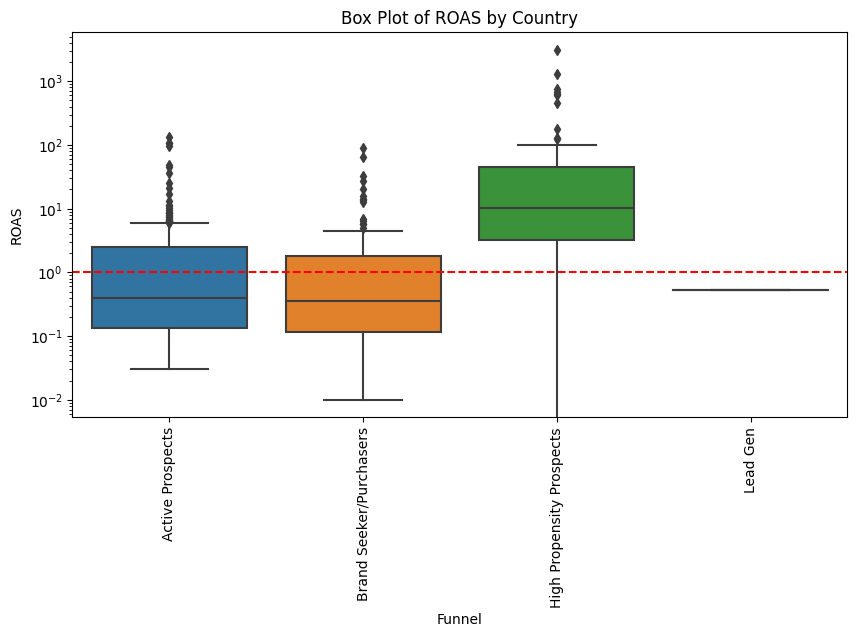

In [365]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('Box Plot of ROAS by Country')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_csb_df, x='Funnel', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()


[]

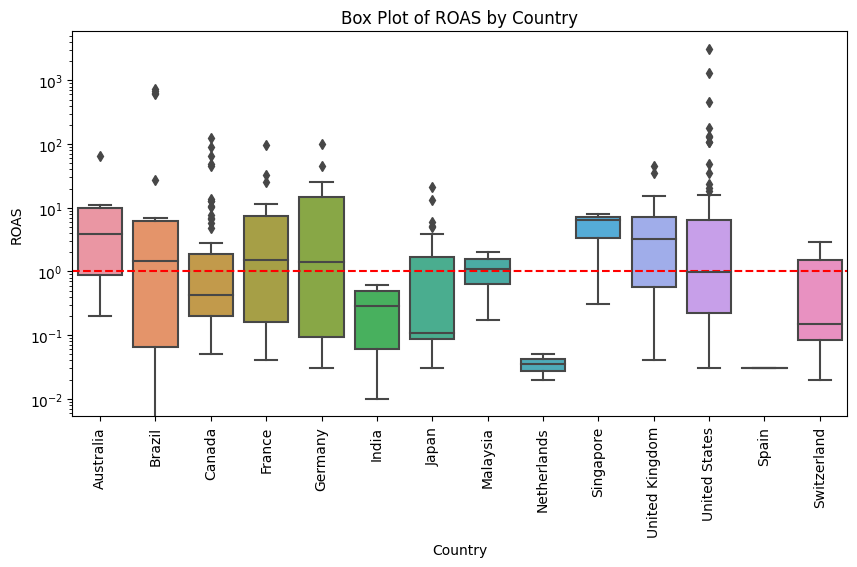

In [364]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('Box Plot of ROAS by Country')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_csb_df, x='Country', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()


[]

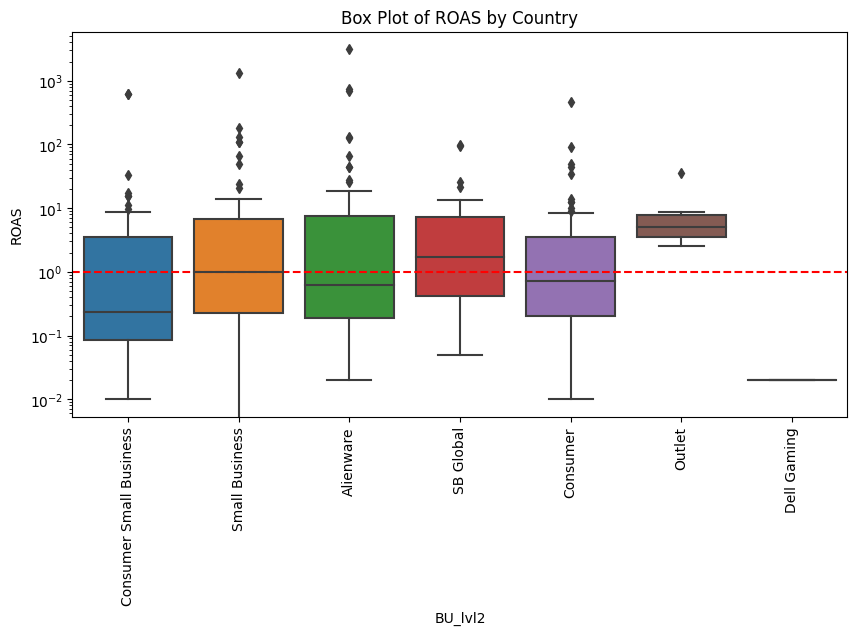

In [363]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('Box Plot of ROAS by Country')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_csb_df, x='BU_lvl2', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()


[]

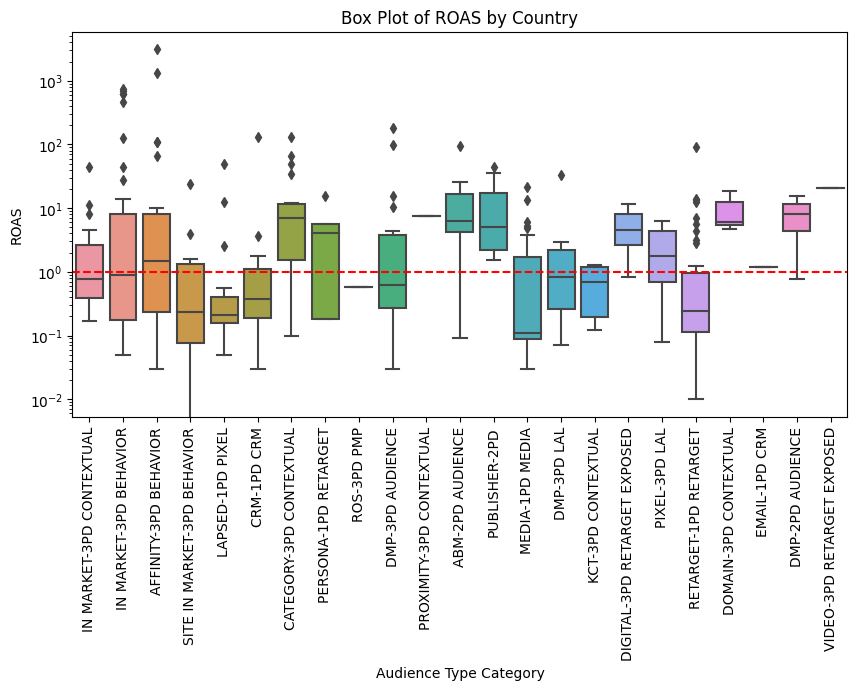

In [367]:
# Create a box plot by 'BU_lvl1'
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set plot title and labels
ax1.set_title('Box Plot of ROAS by Country')
ax1.set_ylabel('ROAS')

# Create the box plot
sns.boxplot(data=grouped_csb_df, x='Audience Type Category', y='ROAS')

plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')

plt.xticks(rotation=90)

# Show the plot
plt.semilogy()
